- There are total 777 firms data from 46 different cities of a state that are listed by the auditors for targeting   the next field-audit work. The target-offices are listed from 14 different sectors.
- Many risk factors are examined from various areas like past records of audit office, audit-paras, environmental     conditions reports, firm reputation summary, on-going issues report, profit-value records, loss-value records,     follow-up reports etc. After in-depth interview with the auditors, important risk factors are evaluated and their   probability of existence is calculated from the present and past records

- PARA_A : Audit Parameter A in the report
- PARA_B: Audit Parameter B in the report
- TOTAL: Sum of Audit Parameters A and B
- Sector_score: score of the organization in its respective sector
- numbers: rating of the organization
- Loss_score: loss value of the organization
- Money_value: money value of the organization
- History_score: historical score of the organization
- District: type of district belong to
- Risk: fraudulent or not

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [18]:
audit=pd.read_csv("audit_data.csv")
audit

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.1800,0.6,2.50800,2.5000,0.2,0.50000,6.6800,5.0,0.2,1.0,3.380,0.2,0.6760,2,0.2,0.4,0,0.2,0.0,2.4,8.57400,0.4,0.5,1.714800,1
1,3.89,6,0.0000,0.2,0.00000,4.8300,0.2,0.96600,4.8300,5.0,0.2,1.0,0.940,0.2,0.1880,2,0.2,0.4,0,0.2,0.0,2.0,2.55400,0.4,0.5,0.510800,0
2,3.89,6,0.5100,0.2,0.10200,0.2300,0.2,0.04600,0.7400,5.0,0.2,1.0,0.000,0.2,0.0000,2,0.2,0.4,0,0.2,0.0,2.0,1.54800,0.4,0.5,0.309600,0
3,3.89,6,0.0000,0.2,0.00000,10.8000,0.6,6.48000,10.8000,6.0,0.6,3.6,11.750,0.6,7.0500,2,0.2,0.4,0,0.2,0.0,4.4,17.53000,0.4,0.5,3.506000,1
4,3.89,6,0.0000,0.2,0.00000,0.0800,0.2,0.01600,0.0800,5.0,0.2,1.0,0.000,0.2,0.0000,2,0.2,0.4,0,0.2,0.0,2.0,1.41600,0.4,0.5,0.283200,0
5,3.89,6,0.0000,0.2,0.00000,0.8300,0.2,0.16600,0.8300,5.0,0.2,1.0,2.950,0.2,0.5900,2,0.2,0.4,0,0.2,0.0,2.0,2.15600,0.4,0.5,0.431200,0
6,3.89,7,1.1000,0.4,0.44000,7.4100,0.4,2.96400,8.5100,5.0,0.2,1.0,44.950,0.6,26.9700,2,0.2,0.4,0,0.2,0.0,3.2,31.77400,0.4,0.5,6.354800,1
7,3.89,8,8.5000,0.6,5.10000,12.0300,0.6,7.21800,20.5300,5.5,0.4,2.2,7.790,0.4,3.1160,2,0.2,0.4,0,0.2,0.0,4.2,18.03400,0.4,0.5,3.606800,1
8,3.89,8,8.4000,0.6,5.04000,11.0500,0.6,6.63000,19.4500,5.5,0.4,2.2,7.340,0.4,2.9360,2,0.2,0.4,0,0.2,0.0,4.2,17.20600,0.4,0.5,3.441200,1
9,3.89,8,3.9800,0.6,2.38800,0.9900,0.2,0.19800,4.9700,5.0,0.2,1.0,1.930,0.2,0.3860,2,0.2,0.4,0,0.2,0.0,2.4,4.37200,0.4,0.5,0.874400,0


In [3]:
audit.shape

(776, 27)

In [4]:
audit.head()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0


In [5]:
audit.columns

Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B',
       'Score_B', 'Risk_B', 'TOTAL', 'numbers', 'Score_B.1', 'Risk_C',
       'Money_Value', 'Score_MV', 'Risk_D', 'District_Loss', 'PROB', 'RiSk_E',
       'History', 'Prob', 'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK',
       'Detection_Risk', 'Audit_Risk', 'Risk'],
      dtype='object')

In [7]:
trial=pd.read_csv("trial.csv")
trial

,Sector_score,LOCATION_ID,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
0,3.89,23,4.18,6,2.50,2,6.68,5.0,2,3.38,2,2,0,2,0,2,2.4,1
1,3.89,6,0.00,2,4.83,2,4.83,5.0,2,0.94,2,2,0,2,0,2,2.0,0
2,3.89,6,0.51,2,0.23,2,0.74,5.0,2,0.00,2,2,0,2,0,2,2.0,0
3,3.89,6,0.00,2,10.80,6,10.80,6.0,6,11.75,6,2,0,2,0,2,4.4,1
4,3.89,6,0.00,2,0.08,2,0.08,5.0,2,0.00,2,2,0,2,0,2,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,55.57,9,0.49,2,0.40,2,0.89,5.0,2,0.00,2,2,0,2,0,2,2.0,0
772,55.57,16,0.47,2,0.37,2,0.84,5.0,2,0.00,2,2,0,2,0,2,2.0,0
773,55.57,14,0.24,2,0.04,2,0.28,5.0,2,0.00,2,2,0,2,0,2,2.0,0
774,55.57,18,0.20,2,0.00,2,0.20,5.0,2,0.00,2,2,0,2,0,2,2.0,0


In [9]:
trial.head()

,Sector_score,LOCATION_ID,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
0,3.89,23,4.18,6,2.50,2,6.68,5.0,2,3.38,2,2,0,2,0,2,2.4,1
1,3.89,6,0.00,2,4.83,2,4.83,5.0,2,0.94,2,2,0,2,0,2,2.0,0
2,3.89,6,0.51,2,0.23,2,0.74,5.0,2,0.00,2,2,0,2,0,2,2.0,0
3,3.89,6,0.00,2,10.80,6,10.80,6.0,6,11.75,6,2,0,2,0,2,4.4,1
4,3.89,6,0.00,2,0.08,2,0.08,5.0,2,0.00,2,2,0,2,0,2,2.0,0


In [10]:
trial.shape

(776, 18)

In [11]:
trial.columns

Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'SCORE_A', 'PARA_B', 'SCORE_B',
       'TOTAL', 'numbers', 'Marks', 'Money_Value', 'MONEY_Marks', 'District',
       'Loss', 'LOSS_SCORE', 'History', 'History_score', 'Score', 'Risk'],
      dtype='object')

In [12]:
audit.dtypes

Sector_score      float64
LOCATION_ID        object
PARA_A            float64
Score_A           float64
Risk_A            float64
PARA_B            float64
Score_B           float64
Risk_B            float64
TOTAL             float64
numbers           float64
Score_B.1         float64
Risk_C            float64
Money_Value       float64
Score_MV          float64
Risk_D            float64
District_Loss       int64
PROB              float64
RiSk_E            float64
History             int64
Prob              float64
Risk_F            float64
Score             float64
Inherent_Risk     float64
CONTROL_RISK      float64
Detection_Risk    float64
Audit_Risk        float64
Risk                int64
dtype: object

In [13]:
trial.dtypes

Sector_score     float64
LOCATION_ID       object
PARA_A           float64
SCORE_A            int64
PARA_B           float64
SCORE_B            int64
TOTAL            float64
numbers          float64
Marks              int64
Money_Value      float64
MONEY_Marks        int64
District           int64
Loss               int64
LOSS_SCORE         int64
History            int64
History_score      int64
Score            float64
Risk               int64
dtype: object

In [14]:
audit.isnull().sum()

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       1
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64

In [15]:
trial.isnull().sum()

Sector_score     0
LOCATION_ID      0
PARA_A           0
SCORE_A          0
PARA_B           0
SCORE_B          0
TOTAL            0
numbers          0
Marks            0
Money_Value      1
MONEY_Marks      0
District         0
Loss             0
LOSS_SCORE       0
History          0
History_score    0
Score            0
Risk             0
dtype: int64

In [16]:
loss = audit.groupby(["LOCATION_ID"],as_index=True).aggregate("sum")
loss #loss at location level

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
LOCATION_ID,,,,,,,,,,,,,,,,,,,,,
1,223.77,21.6300,4.8,11.52400,68.8000,4.4,41.03000,90.4300,62.0,4.6,...,13.2,5,2.8,2.8,43.2,725.09000,16.0,5.5,402.314000,9
11,469.93,69.6200,9.6,37.71400,269.8417,9.2,157.44634,339.4617,133.5,6.4,...,10.4,2,5.6,1.2,73.8,422.73634,11.6,13.0,96.309668,11
12,967.53,120.6200,16.6,66.96600,339.7400,13.4,196.18000,460.3600,236.0,9.8,...,21.2,6,10.6,2.8,119.6,530.00000,24.0,23.5,244.674400,16
13,884.28,72.0600,12.8,39.55800,376.4032,10.2,218.52064,448.4632,175.0,7.0,...,14.4,1,7.2,0.4,88.4,372.73264,14.8,17.5,115.724928,11
14,465.57,55.9900,7.6,31.67600,208.5700,6.2,123.53800,264.5600,100.0,4.0,...,8.0,1,4.2,0.4,51.0,239.26600,8.4,10.0,59.394800,5
15,809.91,97.5500,13.8,54.38000,275.6625,12.2,161.14650,373.2125,176.5,7.6,...,14.0,2,7.4,0.8,97.8,441.73050,14.8,17.5,97.979700,12
16,859.02,110.3600,18.2,60.20200,557.5970,16.4,327.10340,667.9570,264.5,12.2,...,33.2,2,10.8,0.8,144.2,739.39540,34.0,26.0,300.169480,22
17,55.57,0.0000,0.2,0.00000,0.0000,0.2,0.00000,0.0000,5.0,0.2,...,0.4,0,0.2,0.0,2.0,1.40000,0.4,0.5,0.280000,0
18,381.65,23.8800,5.0,12.08800,116.1200,4.8,68.06000,140.0000,82.0,4.0,...,7.6,4,4.0,2.0,42.8,182.80400,9.6,8.0,102.673600,5


In [19]:
loss.shape

(45, 26)

In [20]:
loss.dtypes

Sector_score      float64
PARA_A            float64
Score_A           float64
Risk_A            float64
PARA_B            float64
Score_B           float64
Risk_B            float64
TOTAL             float64
numbers           float64
Score_B.1         float64
Risk_C            float64
Money_Value       float64
Score_MV          float64
Risk_D            float64
District_Loss       int64
PROB              float64
RiSk_E            float64
History             int64
Prob              float64
Risk_F            float64
Score             float64
Inherent_Risk     float64
CONTROL_RISK      float64
Detection_Risk    float64
Audit_Risk        float64
Risk                int64
dtype: object

In [21]:
money_value=audit[["LOCATION_ID","Money_Value"]].groupby("LOCATION_ID",as_index=False).aggregate("sum")
money_value.sort_values("Money_Value",ascending=False) #top locations having max loss

,LOCATION_ID,Money_Value
10,2,3266.590
9,19,1385.070
0,1,1051.720
6,16,448.150
13,22,440.640
2,12,340.150
40,8,337.877
37,5,323.480
1,11,320.130
5,15,299.290


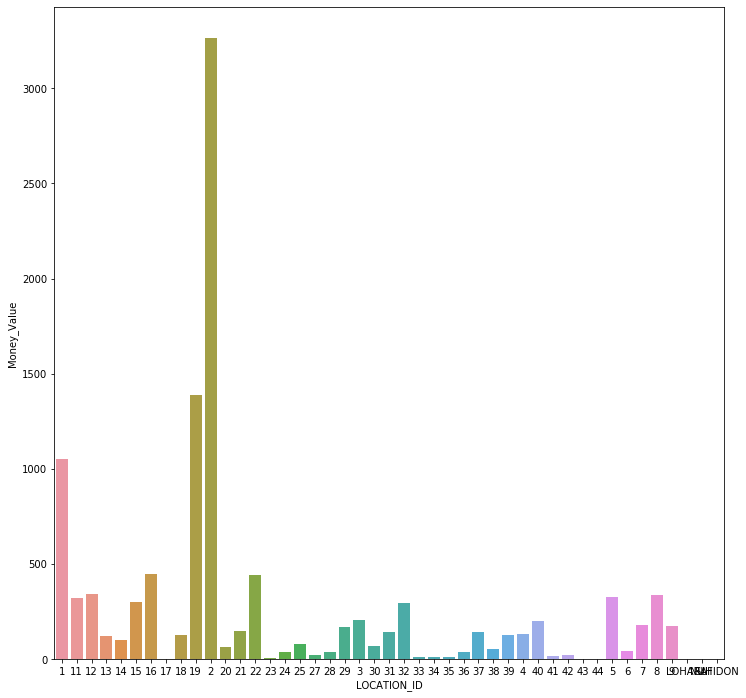

In [25]:
plt.rcParams['figure.figsize']=(12,12)
sns.barplot(x='LOCATION_ID',y='Money_Value',data=money_value)

In [26]:
total_risk=audit[["LOCATION_ID","TOTAL"]].groupby("LOCATION_ID",as_index=False).aggregate("sum")
total_risk.sort_values("TOTAL",ascending=False).head()

,LOCATION_ID,TOTAL
10,2,1897.3500
40,8,815.0113
6,16,667.9570
41,9,662.4421
9,19,499.9200


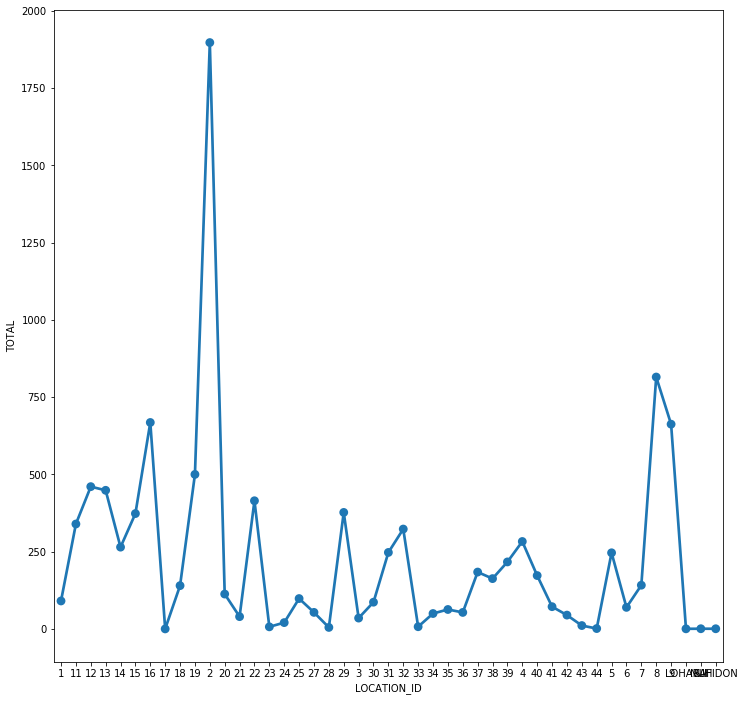

In [27]:
plt.rcParams['figure.figsize']=(12,12)
sns.pointplot(x="LOCATION_ID",y="TOTAL",data=total_risk)

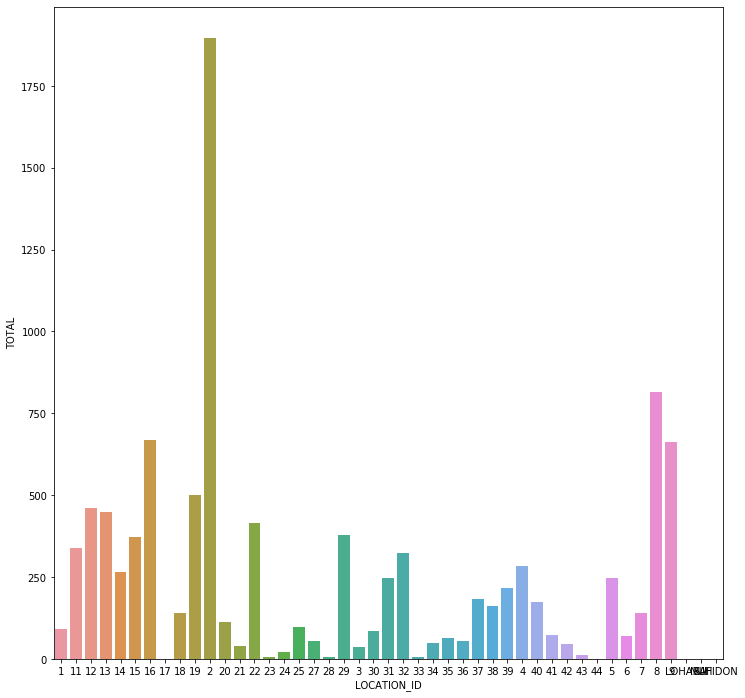

In [28]:
sns.barplot(x="LOCATION_ID",y="TOTAL",data=total_risk)

## Location 2 has the highest in terms of risk 

In [29]:
trial["District"]=trial["District"].astype("object")

In [30]:
trial.dtypes

Sector_score     float64
LOCATION_ID       object
PARA_A           float64
SCORE_A            int64
PARA_B           float64
SCORE_B            int64
TOTAL            float64
numbers          float64
Marks              int64
Money_Value      float64
MONEY_Marks        int64
District          object
Loss               int64
LOSS_SCORE         int64
History            int64
History_score      int64
Score            float64
Risk               int64
dtype: object

In [31]:
district_level=trial[["District","Score"]].groupby("District",as_index=False).aggregate("sum")
district_level

,District,Score
0,2,1717.0
1,4,144.6
2,6,235.6


In [32]:
trial["District"].nunique()

3

In [33]:
district_names=trial["District"].value_counts().index
district_names

Int64Index([2, 6, 4], dtype='int64')

In [34]:
district_level_scores=district_level["Score"].values
district_level_scores

array([1717. ,  144.6,  235.6])

([<matplotlib.patches.Wedge at 0x7fcab3c94250>,
 [Text(-0.9263657007158933, 0.5931665773938651, '2'),
  Text(0.664243371130073, -0.8768014278670835, '6'),
  Text(1.0322014790107912, -0.38021060838426796, '4')],
 [Text(-0.505290382208669, 0.3235454058511991, '81.87%'),
  Text(0.36231456607094886, -0.4782553242911364, '6.89%'),
  Text(0.5630189885513406, -0.20738760457323704, '11.23%')])

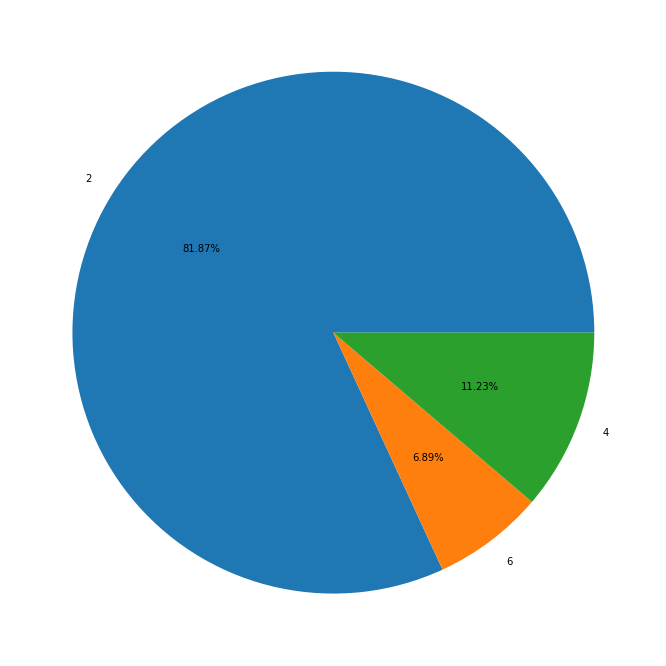

In [35]:
plt.pie(district_level_scores,labels=district_names,autopct='%1.2f%%')

## District 2 has highest score in terms of audit Practice

# Building a classification model that can predict the fraudulent firm on the basis the present and historical risk factors

### Classifying Fraudulent Firms using Random forest

In [39]:
pip install xgboost

     |████████████████████████████████| 1.7 MB 1.4 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [40]:
%matplotlib inline
import itertools
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC 
plt.style.use('fivethirtyeight')

In [41]:
cols_del=['LOCATION_ID','TOTAL']

audit.drop(cols_del, axis=1, inplace=True)

In [42]:
audit.head()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,4.18,0.6,2.508,2.50,0.2,0.500,5.0,0.2,1.0,3.38,0.2,0.676,2,0.2,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,0.00,0.2,0.000,4.83,0.2,0.966,5.0,0.2,1.0,0.94,0.2,0.188,2,0.2,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,0.51,0.2,0.102,0.23,0.2,0.046,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,0.00,0.2,0.000,10.80,0.6,6.480,6.0,0.6,3.6,11.75,0.6,7.050,2,0.2,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,0.00,0.2,0.000,0.08,0.2,0.016,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0


In [43]:
audit.info

<bound method DataFrame.info of      Sector_score   PARA_A  Score_A    Risk_A     PARA_B  Score_B     Risk_B  \
0            3.89   4.1800      0.6   2.50800     2.5000      0.2    0.50000   
1            3.89   0.0000      0.2   0.00000     4.8300      0.2    0.96600   
2            3.89   0.5100      0.2   0.10200     0.2300      0.2    0.04600   
3            3.89   0.0000      0.2   0.00000    10.8000      0.6    6.48000   
4            3.89   0.0000      0.2   0.00000     0.0800      0.2    0.01600   
5            3.89   0.0000      0.2   0.00000     0.8300      0.2    0.16600   
6            3.89   1.1000      0.4   0.44000     7.4100      0.4    2.96400   
7            3.89   8.5000      0.6   5.10000    12.0300      0.6    7.21800   
8            3.89   8.4000      0.6   5.04000    11.0500      0.6    6.63000   
9            3.89   3.9800      0.6   2.38800     0.9900      0.2    0.19800   
10           3.89   5.4300      0.6   3.25800    10.7700      0.6    6.46200   
11      

In [45]:
audit.describe()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,775.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.0,776.000000,776.000000
mean,20.184536,2.450194,0.351289,1.351029,10.799988,0.313144,6.334008,5.067655,0.223711,1.152964,14.137631,0.290979,8.265434,2.505155,0.206186,0.519072,0.104381,0.216753,0.053608,2.702577,17.680612,0.572680,0.5,7.168158,0.393041
std,24.319017,5.678870,0.174055,3.440447,50.083624,0.169804,30.072845,0.264449,0.080352,0.537417,66.606519,0.159745,39.970849,1.228678,0.037508,0.290312,0.531031,0.067987,0.305835,0.858923,54.740244,0.444581,0.0,38.667494,0.488741
min,1.850000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,5.000000,0.200000,1.000000,0.000000,0.200000,0.000000,2.000000,0.200000,0.400000,0.000000,0.200000,0.000000,2.000000,1.400000,0.400000,0.5,0.280000,0.000000
25%,2.370000,0.210000,0.200000,0.042000,0.000000,0.200000,0.000000,5.000000,0.200000,1.000000,0.000000,0.200000,0.000000,2.000000,0.200000,0.400000,0.000000,0.200000,0.000000,2.000000,1.583500,0.400000,0.5,0.316700,0.000000
50%,3.890000,0.875000,0.200000,0.175000,0.405000,0.200000,0.081000,5.000000,0.200000,1.000000,0.090000,0.200000,0.018000,2.000000,0.200000,0.400000,0.000000,0.200000,0.000000,2.400000,2.214000,0.400000,0.5,0.555600,0.000000
75%,55.570000,2.480000,0.600000,1.488000,4.160000,0.400000,1.840500,5.000000,0.200000,1.000000,5.595000,0.400000,2.235000,2.000000,0.200000,0.400000,0.000000,0.200000,0.000000,3.250000,10.663500,0.400000,0.5,3.249900,1.000000
max,59.850000,85.000000,0.600000,51.000000,1264.630000,0.600000,758.778000,9.000000,0.600000,5.400000,935.030000,0.600000,561.018000,6.000000,0.600000,2.400000,9.000000,0.600000,5.400000,5.200000,801.262000,5.800000,0.5,961.514400,1.000000


In [46]:
audit.isna().sum()

Sector_score      0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       1
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64

In [47]:
audit['Money_Value'].fillna((audit['Money_Value'].mean()), inplace=True)

In [48]:
audit.isnull().sum()

Sector_score      0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       0
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64

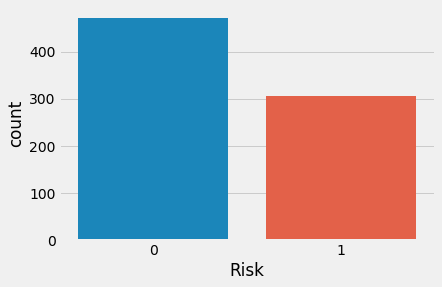

In [49]:
sns.countplot(audit['Risk'], label = "Count")

In [50]:
X=audit.drop(['Risk'],axis=1)

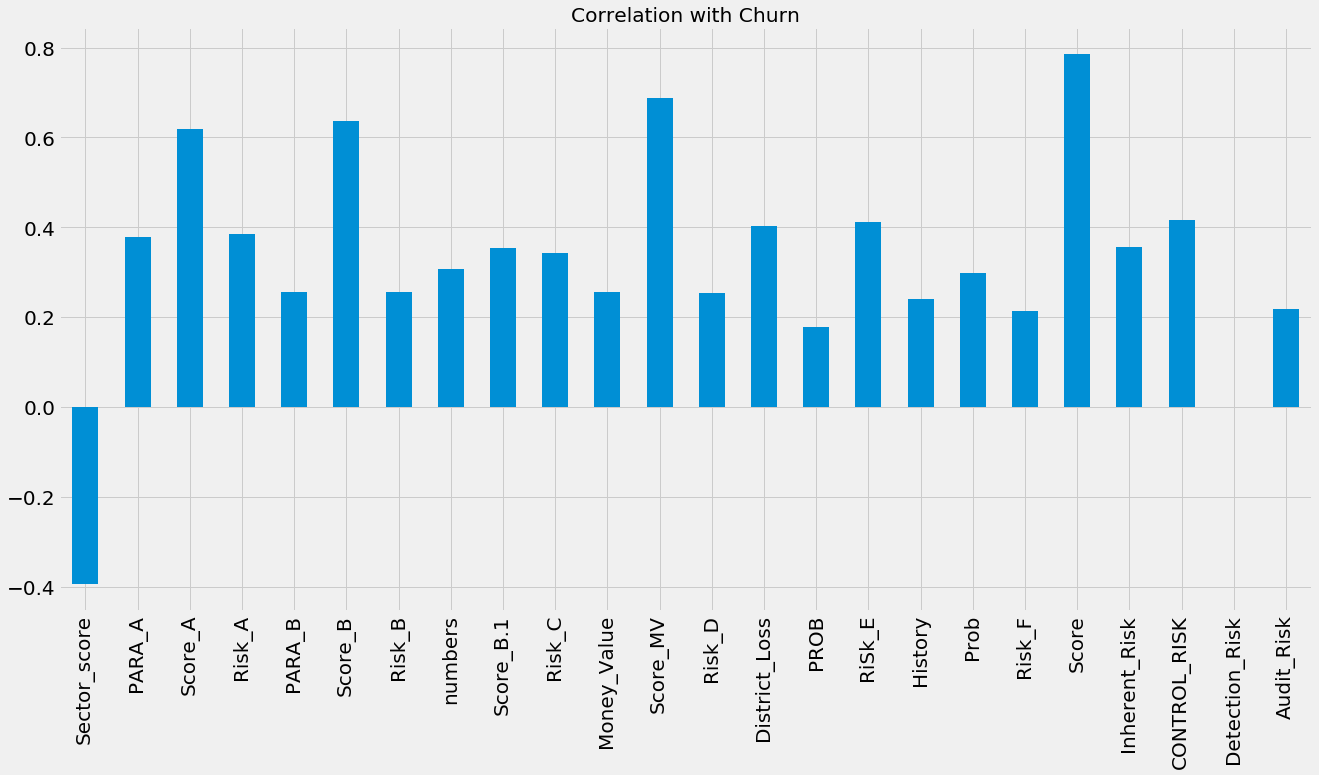

In [51]:
X.corrwith(audit.Risk).plot.bar(
        figsize = (20, 10), title = "Correlation with Churn", fontsize = 20,
        rot = 90, grid = True)

In [52]:
X.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

/Users/yashnaik12/Downloads/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/Users/yashnaik12/Downloads/anaconda3/lib/python3.7/site-packages/pandas/io/formats/style.py:1089: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
/Users/yashnaik12/Downloads/anaconda3/lib/python3.7/site-packages/pandas/io/formats/style.py:1090: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk
Sector_score,1.0,-0.22,-0.43,-0.22,-0.13,-0.22,-0.13,-0.15,-0.17,-0.17,-0.12,-0.32,-0.12,-0.11,-0.087,-0.13,-0.11,-0.14,-0.1,-0.34,-0.17,-0.15,nan,-0.092
PARA_A,-0.22,1.0,0.5,1.0,0.16,0.36,0.16,0.13,0.14,0.14,0.45,0.29,0.45,0.13,0.044,0.12,0.12,0.17,0.1,0.43,0.48,0.15,nan,0.22
Score_A,-0.43,0.5,1.0,0.5,0.25,0.57,0.25,0.24,0.27,0.27,0.21,0.48,0.2,0.089,0.094,0.1,0.18,0.27,0.15,0.72,0.32,0.17,nan,0.2
Risk_A,-0.22,1.0,0.5,1.0,0.17,0.36,0.17,0.14,0.14,0.14,0.45,0.29,0.45,0.13,0.044,0.12,0.12,0.18,0.11,0.43,0.48,0.15,nan,0.22
PARA_B,-0.13,0.16,0.25,0.17,1.0,0.35,1.0,0.21,0.23,0.22,0.13,0.31,0.12,0.083,0.043,0.079,0.2,0.32,0.2,0.4,0.65,0.19,nan,0.89
Score_B,-0.22,0.36,0.57,0.36,0.35,1.0,0.35,0.28,0.31,0.3,0.21,0.57,0.2,-0.0047,0.093,0.015,0.2,0.31,0.17,0.9,0.37,0.13,nan,0.21
Risk_B,-0.13,0.16,0.25,0.17,1.0,0.35,1.0,0.21,0.23,0.22,0.13,0.31,0.12,0.083,0.043,0.08,0.2,0.32,0.2,0.4,0.65,0.19,nan,0.89
numbers,-0.15,0.13,0.24,0.14,0.21,0.28,0.21,1.0,0.91,0.96,0.19,0.45,0.19,0.13,0.036,0.14,0.2,0.21,0.2,0.5,0.27,0.23,nan,0.22
Score_B.1,-0.17,0.14,0.27,0.14,0.23,0.31,0.23,0.91,1.0,0.99,0.22,0.51,0.22,0.15,0.037,0.16,0.23,0.25,0.22,0.57,0.31,0.26,nan,0.26
Risk_C,-0.17,0.14,0.27,0.14,0.22,0.3,0.22,0.96,0.99,1.0,0.22,0.49,0.22,0.15,0.036,0.15,0.22,0.24,0.22,0.55,0.3,0.25,nan,0.25


In [53]:
X=X.drop(['Detection_Risk'],axis=1) #As we have seen there is no correlation of Detection_Risk so it will be deleted before model building process as it is not contributing well enough for prediction process.

In [54]:
X.columns

Index(['Sector_score', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B', 'Score_B',
       'Risk_B', 'numbers', 'Score_B.1', 'Risk_C', 'Money_Value', 'Score_MV',
       'Risk_D', 'District_Loss', 'PROB', 'RiSk_E', 'History', 'Prob',
       'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK', 'Audit_Risk'],
      dtype='object')

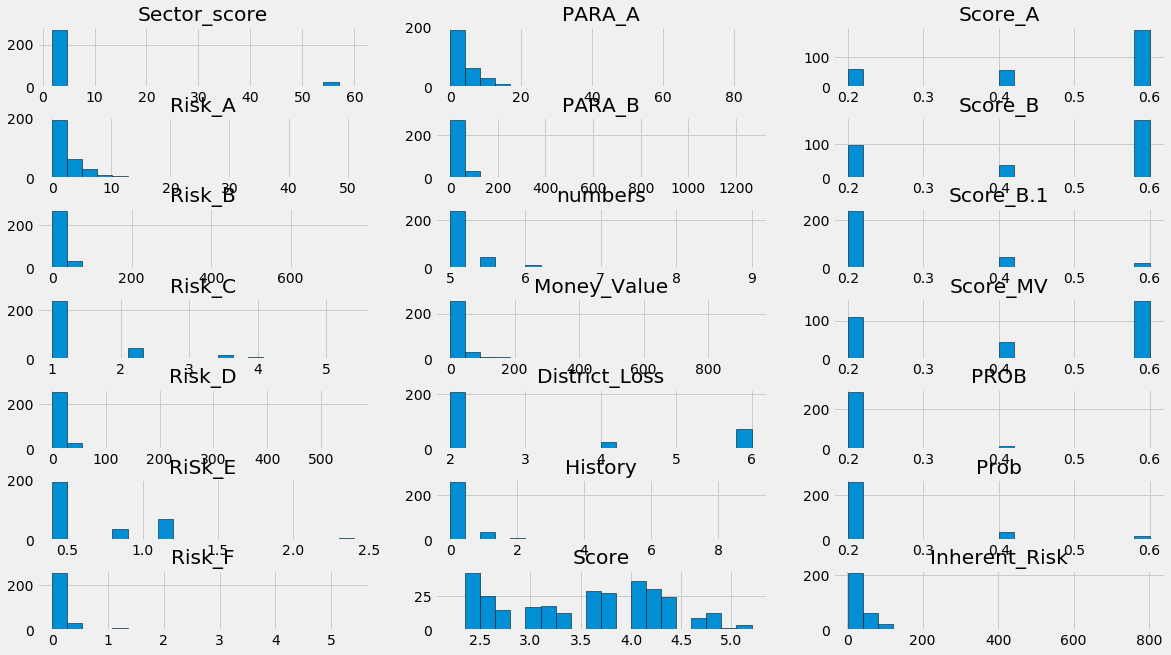

In [55]:
df1=audit[audit['Risk']==1]
columns=df1.columns[:21]
plt.subplots(figsize=(18,15))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    df1[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

In [56]:
y=audit['Risk']

In [57]:
from sklearn.model_selection import train_test_split,cross_val_score #Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,stratify=y, random_state = 123)

In [58]:
from sklearn.preprocessing import StandardScaler #Feature Scaling
sc_X = StandardScaler()
X_train_scaled = pd.DataFrame(sc_X.fit_transform(X_train))
X_test_scaled = pd.DataFrame(sc_X.transform(X_test))

In [60]:
logi = LogisticRegression(C=1, penalty='l1', solver='liblinear',random_state = 0) #Applying Base Model : Logistic Regression
logi.fit(X_train_scaled, y_train)

LogisticRegression(C=1, penalty='l1', random_state=0, solver='liblinear')

In [61]:
kfold = model_selection.KFold(n_splits=10, random_state=7) #cross validation
scoring = 'accuracy'

acc_logi = cross_val_score(estimator = logi, X = X_train_scaled, y = y_train, cv = kfold,scoring=scoring)
acc_logi.mean()

/Users/yashnaik12/Downloads/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.9774193548387096

## Model Evaluation

In [62]:
y_predict_logi = logi.predict(X_test_scaled)
acc= accuracy_score(y_test, y_predict_logi)
roc=roc_auc_score(y_test, y_predict_logi)
prec = precision_score(y_test, y_predict_logi)
rec = recall_score(y_test, y_predict_logi)
f1 = f1_score(y_test, y_predict_logi)

results = pd.DataFrame([['Logistic Regression',acc, acc_logi.mean(),prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy','Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.980769,0.977419,0.967742,0.983607,0.97561,0.981277


# Random Forest

In [64]:
random_forest_e = RandomForestClassifier(n_estimators = 100,criterion='entropy', random_state = 47)
random_forest_e.fit(X_train_scaled, y_train)

RandomForestClassifier(criterion='entropy', random_state=47)

In [65]:
acc_rande = cross_val_score(estimator = random_forest_e, X = X_train_scaled, y = y_train, cv = kfold, scoring=scoring)
acc_rande.mean() #cross validation

0.9983870967741936

In [66]:
y_predict_r = random_forest_e.predict(X_test_scaled)
roc=roc_auc_score(y_test, y_predict_r)
acc = accuracy_score(y_test, y_predict_r)
prec = precision_score(y_test, y_predict_r)
rec = recall_score(y_test, y_predict_r)
f1 = f1_score(y_test, y_predict_r)

model_results = pd.DataFrame([['Random Forest',acc, acc_rande.mean(),prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy','Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.980769,0.977419,0.967742,0.983607,0.97561,0.981277
1,Random Forest,1.000000,0.998387,1.000000,1.000000,1.00000,1.000000


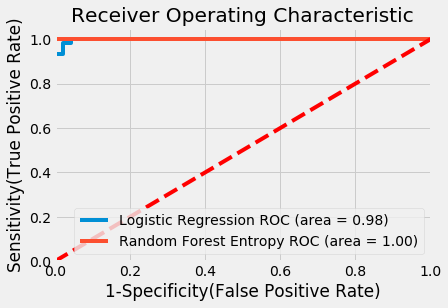

In [68]:
from sklearn import metrics # ROC AUC Curve
import matplotlib.pyplot as plt

plt.figure()

# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'Logistic Regression',
    'model': LogisticRegression(C=1, penalty='l1', solver='liblinear',random_state = 0),
},
    {
    'label': 'Random Forest Entropy',
    'model': RandomForestClassifier(n_estimators = 100,criterion='entropy', random_state = 47),
},
    
]

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(X_train_scaled, y_train) # train the model
    y_pred=model.predict(X_test_scaled) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test_scaled)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict(X_test_scaled))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

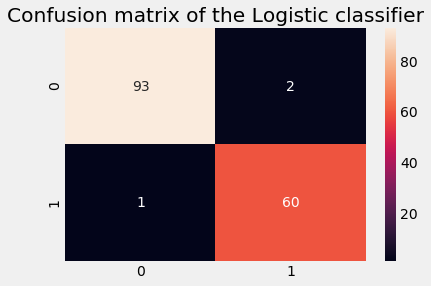

In [69]:
cm_logi = confusion_matrix(y_test, y_predict_logi) # confusion matrix
plt.title('Confusion matrix of the Logistic classifier')
sns.heatmap(cm_logi,annot=True,fmt="d")
plt.show()

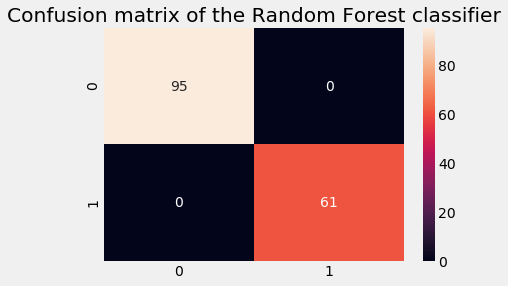

In [70]:
cm_r = confusion_matrix(y_test, y_predict_r)
plt.title('Confusion matrix of the Random Forest classifier')
sns.heatmap(cm_r,annot=True,fmt="d")
plt.show()

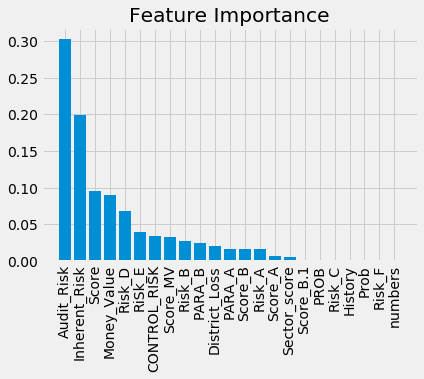

In [71]:
importances = random_forest_e.feature_importances_ #feature importance plot
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X.columns[i] for i in indices]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), names, rotation=90)

# Show plot
plt.show()
